# Machine Learning with Tensorflow for Time Series Analysis of our Weather Anomaly Data

## Introduction

Time Series are the most crucial part of a weather forecast analysis. In this notebook we take a deeper look into our data by performing EDA on our time series anomaly data for the months of April 2016 through May 2016. We will try to mainly focus on the readings we have in the form of average, minimum and maximum air temperature to determine if the forecasts of wind speed are affected by these readings. To the very core, we are trying to determine if "Departures from normal" in air temperature will affect the wind speed or not. It finally boils down to a binary classification which we can perform on our data using Tensorflow but as we already specified in the previous report, we are just diving into the details of why forecasts go wrong, and since we already know they do, we know that air temperature anomalies affect wind speed forecasts and equally have an effect on the error prediction of them.

We first import all the necessary libraries for our in-depth analysis

In [75]:
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

import google.datalab.bigquery as bq

## The Premise and Schema Details

OnPoint Climatology provides hourly and daily weather statistics which can be used to determine ‘departures from normal’ and to provide climatological guidance of expected weather for any location at any point in time. The group is trying to learn the underlying cause behind why weather forecasts go wrong and gain a logistical insight about how weather forecasting companies undergo billions of dollars in loss every year.

For this Project, we are considering United States climatology data for Hourly and Daily weather statistics. Data Columns:
Postal Code  
Date  
Minimum, Average and Maximum Air Temperature (Farenheit)  
& Minimum, Average and Maximum Wind Speeds  

### BigQuery

BigQuery is a fully-managed data warehouse on RESTful web service that enables scalable, cost-effective and fast analysis of big data working in conjunction with Google Cloud Storage. It is a serverless Software as a Service (SaaS) that may be used complementarily with MapReduce. It also has built-in machine learning capabilities.

In [5]:
may = bq.Query.from_table(bq.Table('onpoint.may_weather'), 
                          fields=['postal_code', 'date_valid_std', 'min_temperature_air_2m_f', 'avg_temperature_air_2m_f',
                          'max_temperature_air_2m_f', 'min_wind_speed_100m_mph',
                          'avg_wind_speed_100m_mph', 'max_wind_speed_100m_mph']).execute().result().to_dataframe().set_index('date_valid_std')

apr = bq.Query.from_table(bq.Table('onpoint.apr_weather'), 
                          fields=['postal_code', 'date_valid_std', 'min_temperature_air_2m_f', 'avg_temperature_air_2m_f',
                          'max_temperature_air_2m_f', 'min_wind_speed_100m_mph',
                          'avg_wind_speed_100m_mph', 'max_wind_speed_100m_mph']).execute().result().to_dataframe().set_index('date_valid_std')

mar = bq.Query.from_table(bq.Table('onpoint.mar_weather'), 
                          fields=['postal_code', 'date_valid_std', 'min_temperature_air_2m_f', 'avg_temperature_air_2m_f',
                          'max_temperature_air_2m_f', 'min_wind_speed_100m_mph',
                          'avg_wind_speed_100m_mph', 'max_wind_speed_100m_mph']).execute().result().to_dataframe().set_index('date_valid_std')


### Munging the Data for EDA

We now have queried the dataset for 48,000 rows, converted it to a Pandas DataFrame, and indexed it based on the TimeStamps

In [29]:
mar.describe()

,postal_code,min_temperature_air_2m_f,avg_temperature_air_2m_f,max_temperature_air_2m_f,min_wind_speed_100m_mph,avg_wind_speed_100m_mph,max_wind_speed_100m_mph
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,51249.316125,61.606208,69.555762,78.316554,6.283411,12.796675,19.572551
std,21564.827886,8.255353,5.818335,6.111595,4.679906,4.411587,4.904733
min,32102.000000,29.320000,45.760000,54.010000,0.000000,3.760000,6.390000
25%,33425.000000,55.690000,65.950000,74.475000,2.510000,9.440000,16.260000
50%,34288.000000,63.420000,70.700000,78.620000,5.050000,12.510000,19.370000
75%,77522.000000,68.070000,73.820000,82.670000,9.180000,15.320000,22.540000
max,79852.000000,77.310000,83.800000,100.780000,32.720000,36.220000,43.760000


In [43]:
avg_wind_speed = pd.DataFrame()

avg_wind_speed['mar_avg_wind'] = mar['avg_wind_speed_100m_mph'].values
avg_wind_speed['apr_avg_wind'] = apr['avg_wind_speed_100m_mph'].values
avg_wind_speed['may_avg_wind'] = may['avg_wind_speed_100m_mph'].values

In [47]:
avg_wind_speed.describe()

,mar_avg_wind,apr_avg_wind,may_avg_wind
count,16000.000000,16000.000000,16000.000000
mean,12.796675,11.754938,10.929149
std,4.411587,4.966088,4.317208
min,3.760000,2.280000,2.670000
25%,9.440000,7.940000,7.675000
50%,12.510000,10.975000,10.255000
75%,15.320000,14.650000,13.680000
max,36.220000,37.800000,32.030000


## Exploratory data analysis

Exploratory Data Analysis (EDA) is foundational to working with machine learning, and any other sort of analysis. EDA means getting to know your data, getting your fingers dirty with your data, feeling it and seeing it. The end result is you know your data very well, so when you build models you build them based on an actual, practical, physical understanding of the data, not assumptions or vaguely held notions. You can still make assumptions of course, but EDA means you will understand your assumptions and why you're making those assumptions.

First, take a look at the data.

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


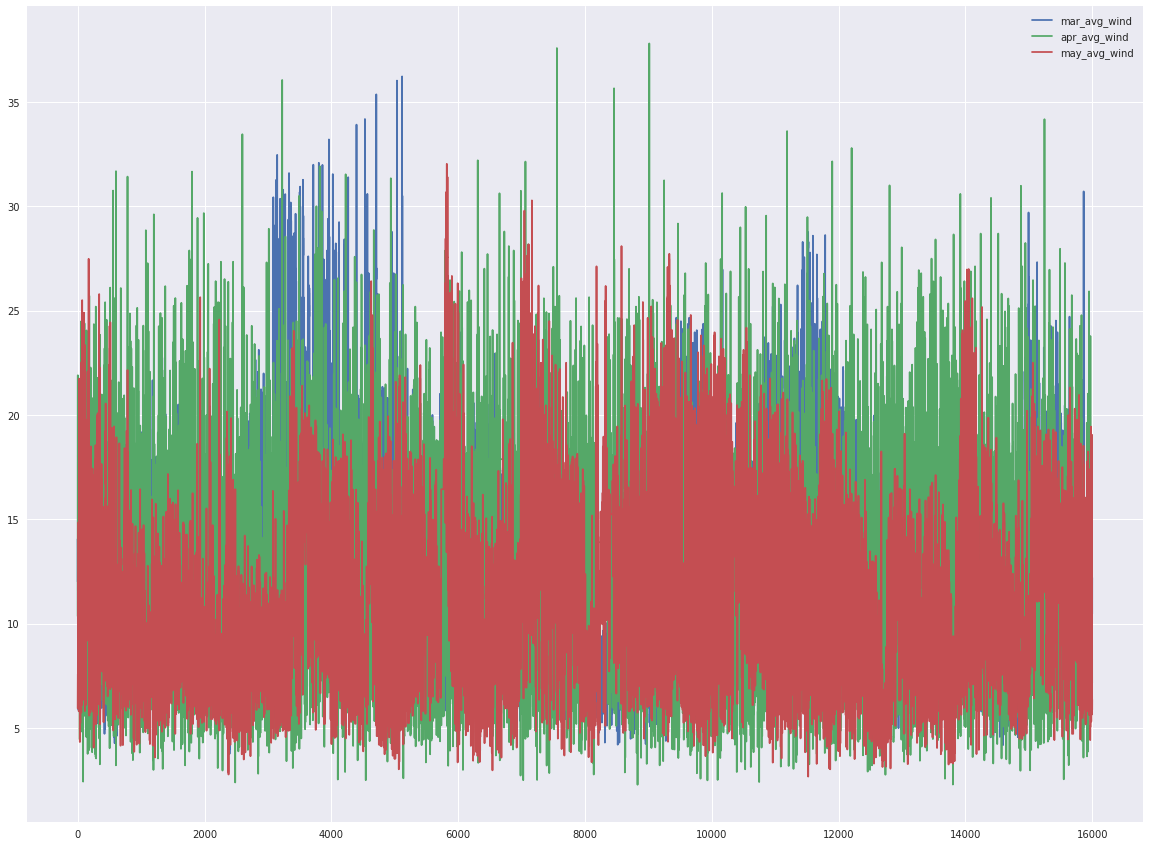

In [48]:
_ = pd.concat([avg_wind_speed['mar_avg_wind'], avg_wind_speed['apr_avg_wind'], avg_wind_speed['may_avg_wind']
              ], axis=1).plot(figsize=(20, 15))

As we can see, the structure is not uniformly visible for other indices, we scale the data by dividing the column values by the maximum.

In [50]:
avg_wind_speed['mar_avg_wind_scaled'] = avg_wind_speed['mar_avg_wind'] / max(avg_wind_speed['mar_avg_wind'])
avg_wind_speed['apr_avg_wind_scaled'] = avg_wind_speed['apr_avg_wind'] / max(avg_wind_speed['apr_avg_wind'])
avg_wind_speed['may_avg_wind_scaled'] = avg_wind_speed['may_avg_wind'] / max(avg_wind_speed['may_avg_wind'])

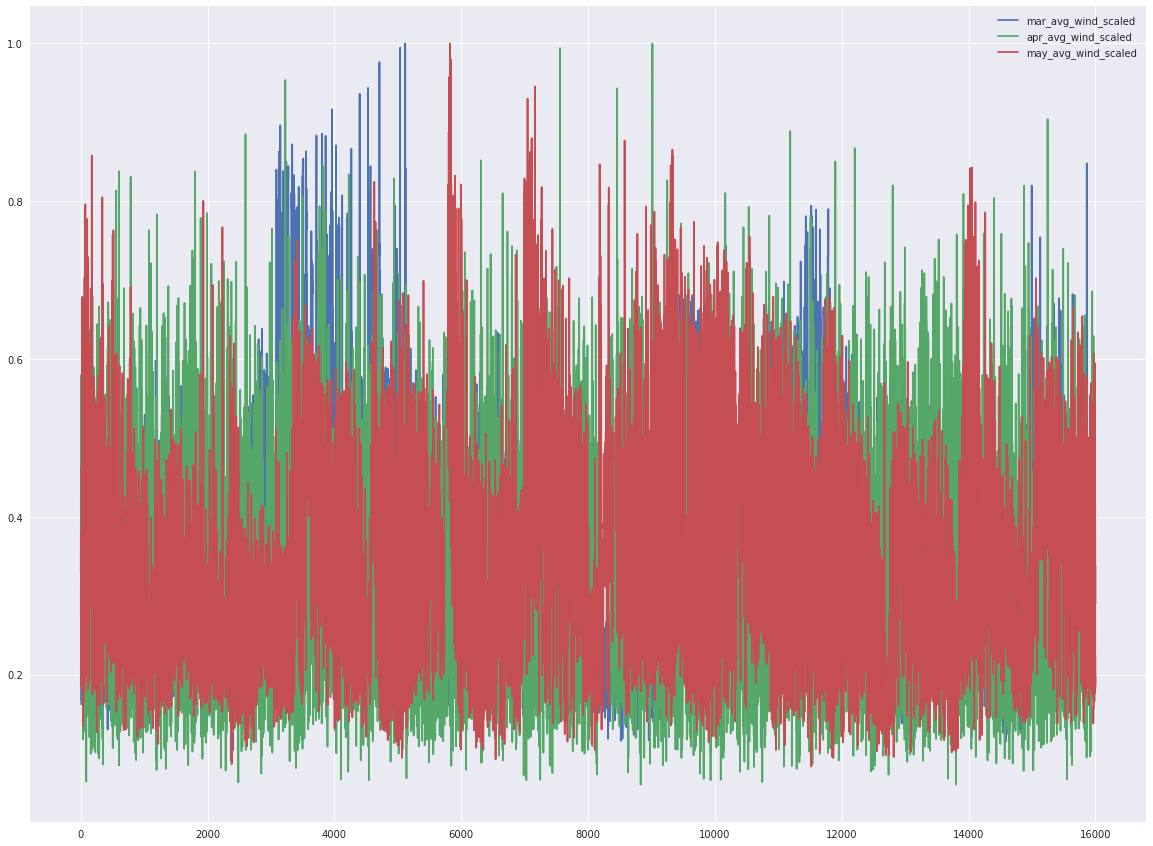

In [51]:
_ = pd.concat([avg_wind_speed['mar_avg_wind_scaled'], avg_wind_speed['apr_avg_wind_scaled'], avg_wind_speed['may_avg_wind_scaled']
              ], axis=1).plot(figsize=(20, 15))

The key takeaway from this plot is that all indices are affected globally. Sudden changes in temperature affects all of these regions at the same time which also signifies that these indices are correlated. Although, the funny thing about weather forecasts is that yesterdays weather may or may not affect todays weather. This is an important fact to be noted when dealing with Time Series.

/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


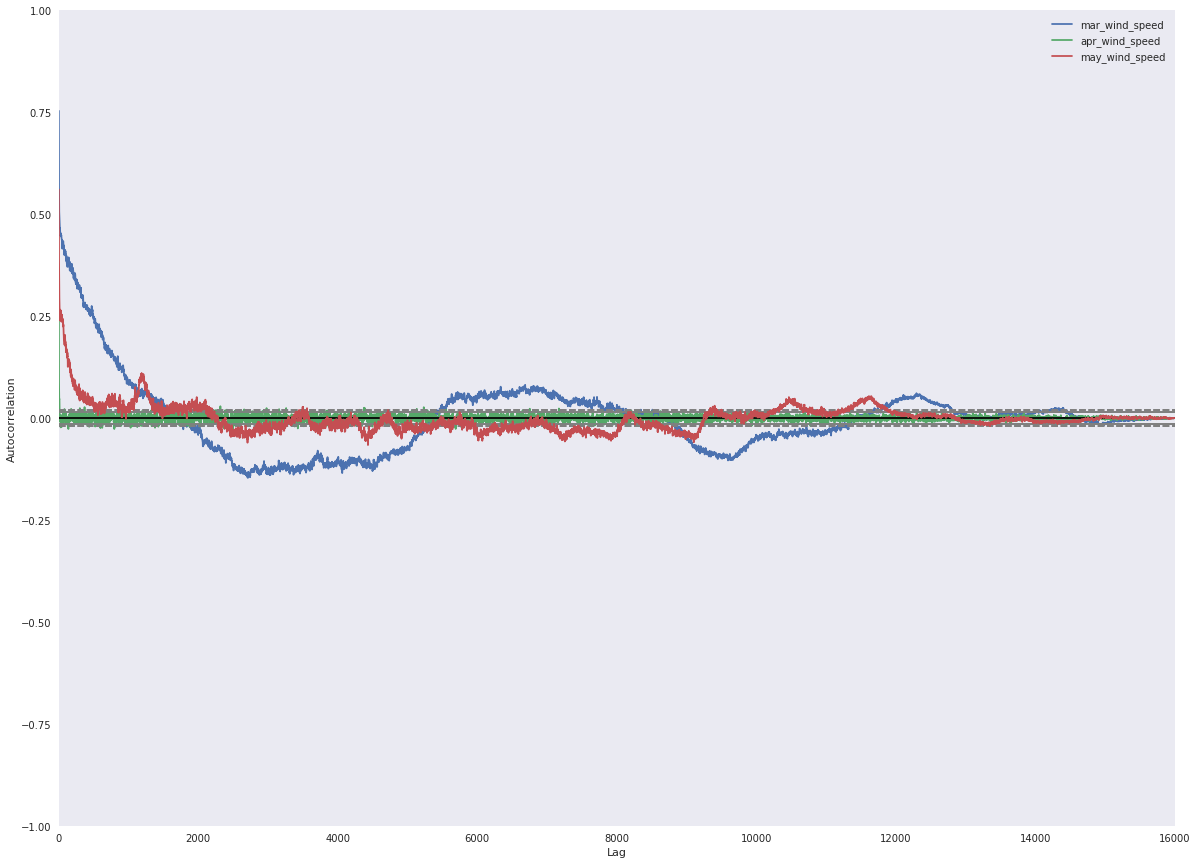

In [53]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

_ = autocorrelation_plot(avg_wind_speed['mar_avg_wind'], label='mar_wind_speed')
_ = autocorrelation_plot(avg_wind_speed['apr_avg_wind'], label='apr_wind_speed')
_ = autocorrelation_plot(avg_wind_speed['may_avg_wind'], label='may_wind_speed')

_ = plt.legend(loc='upper right')

You should see strong autocorrelations, positive for around 2000 lagged readings, then going negative. This tells us something we should intuitively know: if an index is rising it tends to carry on rising, and vice-versa. It should be encouraging that what we see here conforms to what we know about weather forecasts.

/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


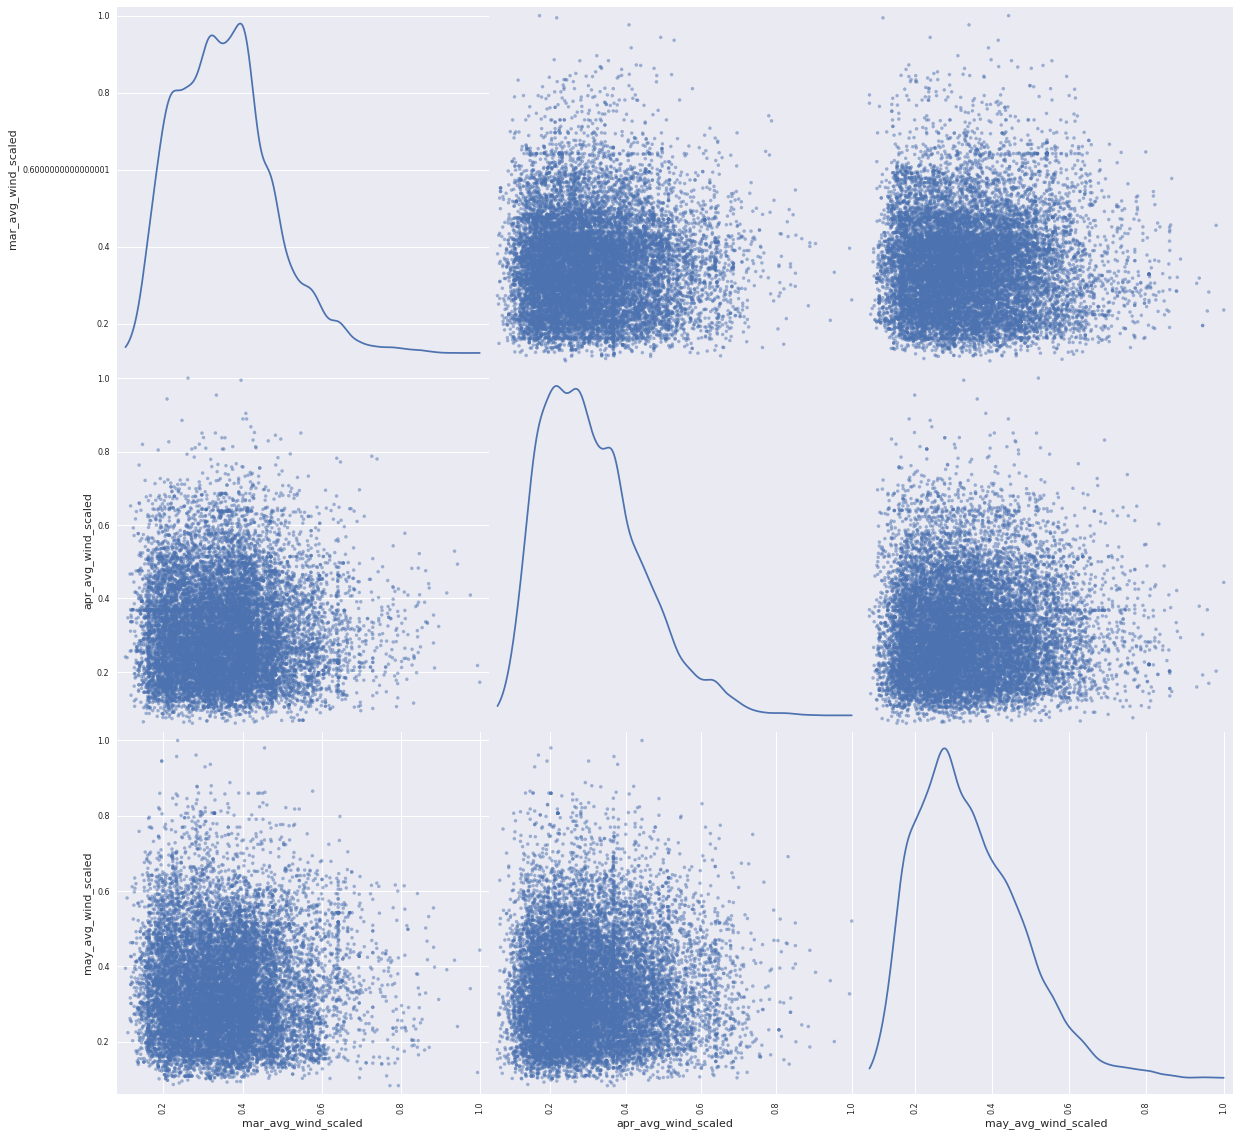

In [54]:
_ = scatter_matrix(pd.concat([avg_wind_speed['mar_avg_wind_scaled'],
  avg_wind_speed['apr_avg_wind_scaled'],
  avg_wind_speed['may_avg_wind_scaled']], axis=1), figsize=(20, 20), diagonal='kde')

We need a Time Series that is stationary in the mean. We should not have any trend in the data. We now try to look at signals in the scatter plot to figure out some strong correlations

In [55]:
log_return_data = pd.DataFrame()

log_return_data['mar_log_return'] = np.log(avg_wind_speed['mar_avg_wind']/avg_wind_speed['mar_avg_wind'].shift())
log_return_data['apr_log_return'] = np.log(avg_wind_speed['apr_avg_wind']/avg_wind_speed['apr_avg_wind'].shift())
log_return_data['may_log_return'] = np.log(avg_wind_speed['may_avg_wind']/avg_wind_speed['may_avg_wind'].shift())

log_return_data.describe()

,mar_log_return,apr_log_return,may_log_return
count,1.599900e+04,15999.000000,15999.000000
mean,9.810810e-07,-0.000023,0.000004
std,2.323651e-01,0.481101,0.372504
min,-1.472026e+00,-2.031432,-1.680277
25%,-2.353050e-02,-0.206539,-0.135283
50%,0.000000e+00,0.000000,0.000000
75%,2.339526e-02,0.214813,0.137190
max,1.505483e+00,2.289415,2.060989


Here, we see a significant amount of increase in the March log return data. We try to scale it and normalize the standard deviation to make it more centered, but we faced difficulties in making the data centered around the edges.

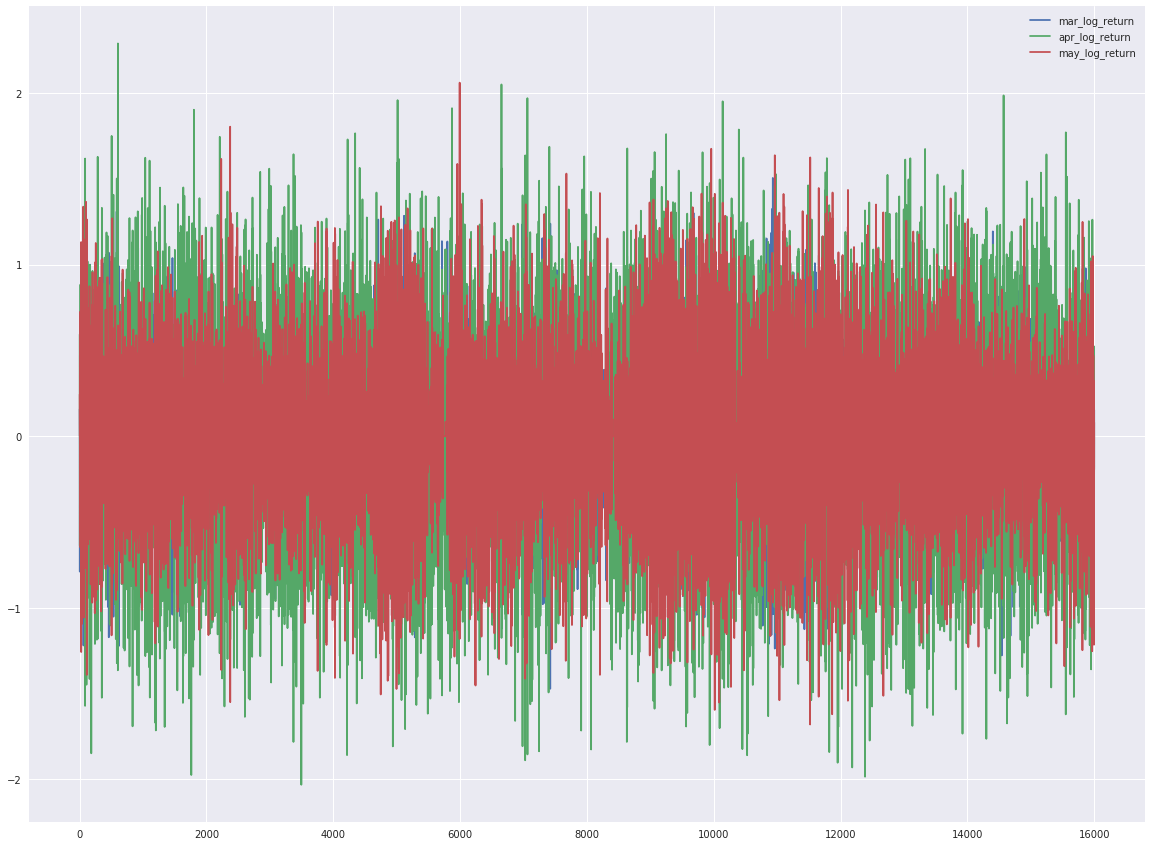

In [56]:
_ = pd.concat([log_return_data['mar_log_return'],
  log_return_data['apr_log_return'],
  log_return_data['may_log_return']], axis=1).plot(figsize=(20, 15))

/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


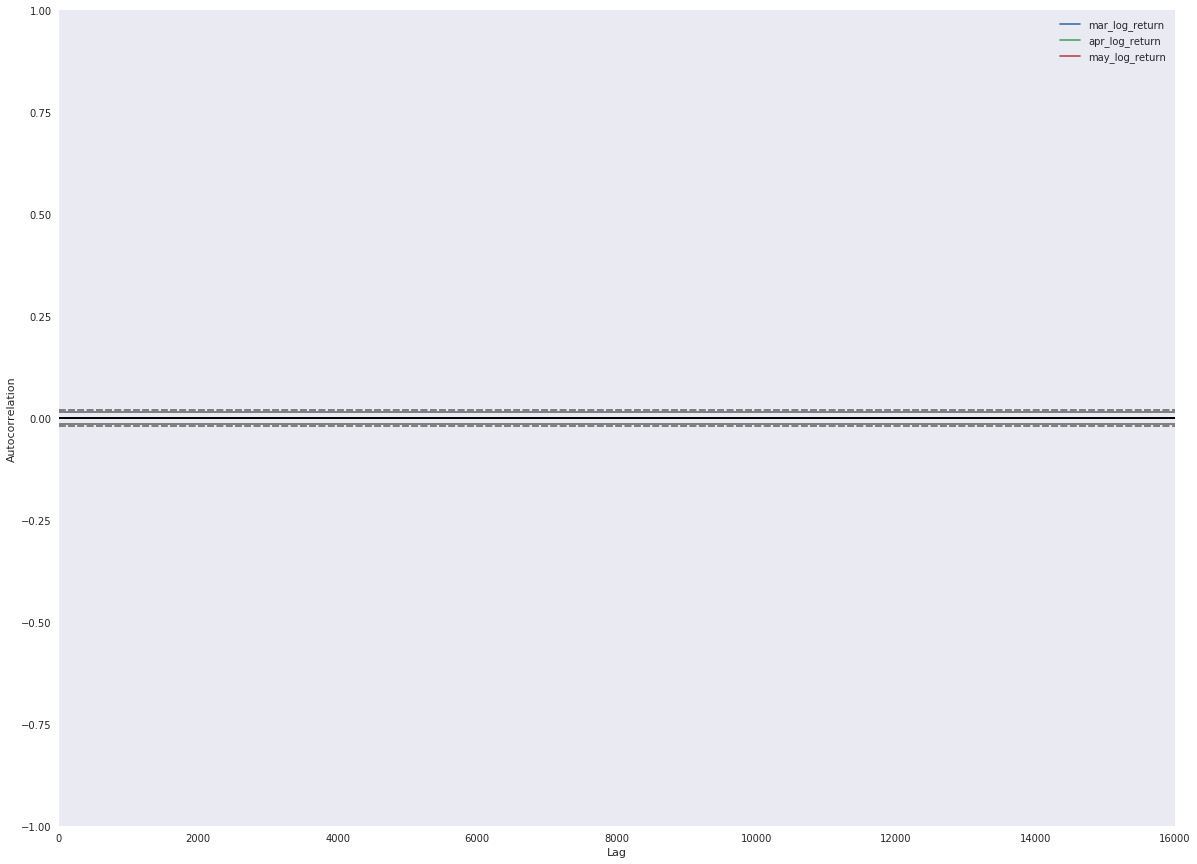

In [57]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

_ = autocorrelation_plot(log_return_data['mar_log_return'], label='mar_log_return')
_ = autocorrelation_plot(log_return_data['apr_log_return'], label='apr_log_return')
_ = autocorrelation_plot(log_return_data['may_log_return'], label='may_log_return')

/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


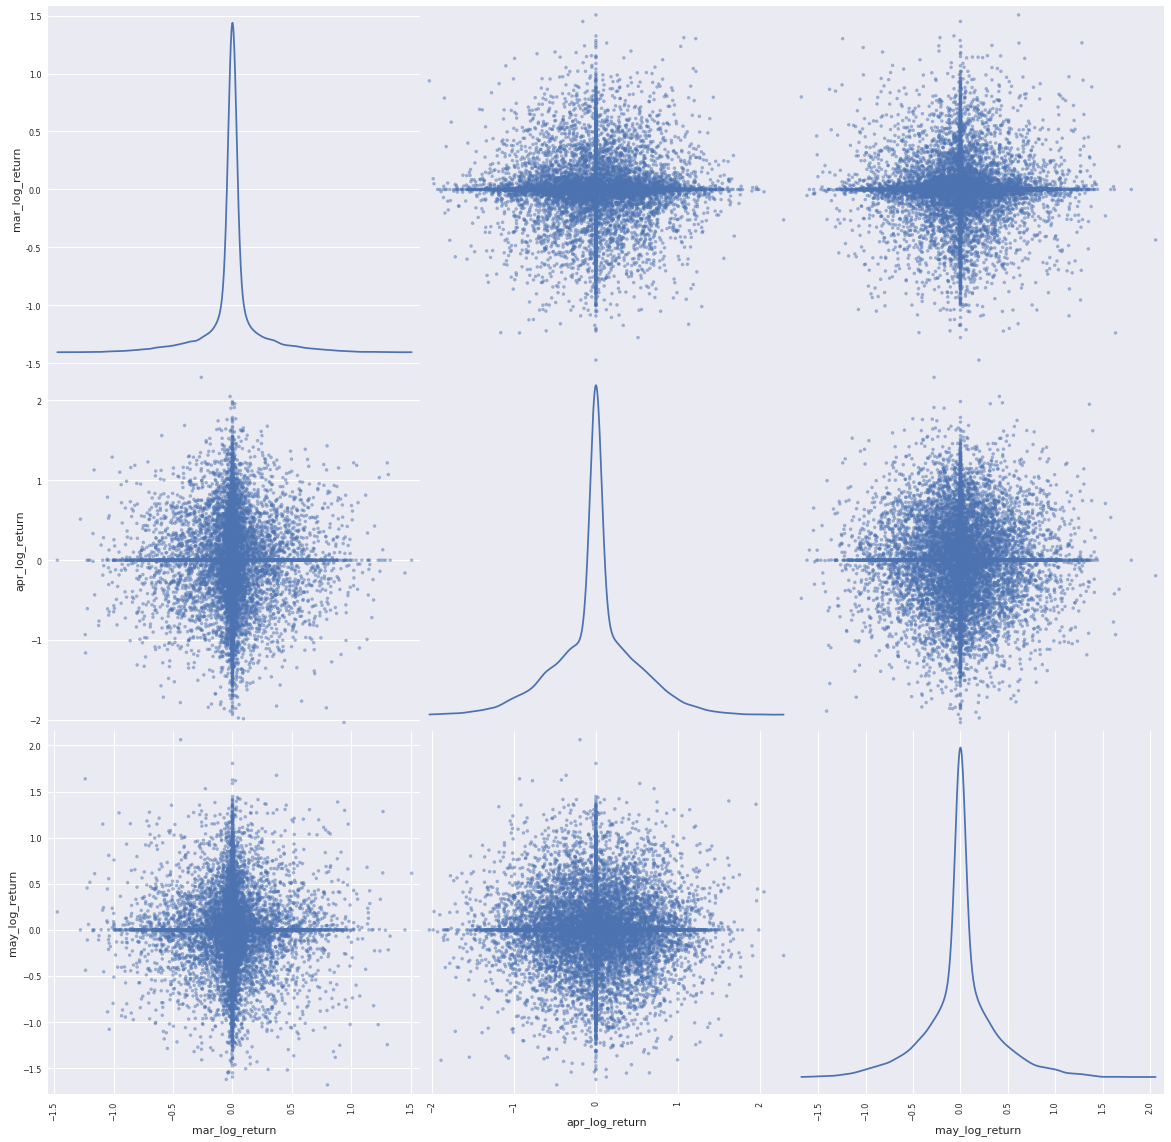

In [58]:
_ = scatter_matrix(log_return_data, figsize=(20, 20), diagonal='kde')

In [59]:
tmp = pd.DataFrame()
tmp['mar_0'] = log_return_data['mar_log_return']
tmp['apr_1'] = log_return_data['apr_log_return'].shift()
tmp['may_1'] = log_return_data['may_log_return'].shift()

tmp.corr().iloc[:,0]

mar_0    1.000000
apr_1   -0.000937
may_1    0.004566
Name: mar_0, dtype: float64

In [60]:
tmp = pd.DataFrame()
tmp['mar_0'] = log_return_data['mar_log_return']
tmp['apr_1'] = log_return_data['apr_log_return'].shift(2)
tmp['may_1'] = log_return_data['may_log_return'].shift(2)

tmp.corr().iloc[:,0]

mar_0    1.000000
apr_1    0.008919
may_1   -0.015234
Name: mar_0, dtype: float64

# The Takeaway

Here, we are directly working with the premise. We're correlating the average wind speed of March anomalies before the end of the month,  we can see almost next to no correlation among the weather and wind speeds for the data for 2 months. We can conclude at this point that weather data forecasts can be tricky and there are almost always no similarities between the behavior of actual vs forecast weather. There are many variables that affect this cause and in our non-trivial analysis of a unique hypothesis, we find no significant evidence as to why weather data is so unpredicatble. What we did achieve on the other hand is a good standpoint for feature selection for our Time Series data. Further work could be to dive deeper into weather fundamentals and how readings are measured to maybe shape our EDA to a better direction of finding strong correlations between weather forecast anomalies.